In [124]:
import numpy as np
import pandas as pd
import charset_normalizer
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
eq = pd.read_csv('C:/Users/Nikhil/AppData/Local/Temp/Temp1_database.csv.zip/database.csv')

In [93]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [121]:
eq['Date'] = pd.to_datetime(eq['Date'],format='%m/%d/%y')

In [122]:
eq['Date']

0       1965-01-02 00:00:00+00:00
1       1965-01-04 00:00:00+00:00
2       1965-01-05 00:00:00+00:00
3       1965-01-08 00:00:00+00:00
4       1965-01-09 00:00:00+00:00
                   ...           
23407   2016-12-28 00:00:00+00:00
23408   2016-12-28 00:00:00+00:00
23409   2016-12-28 00:00:00+00:00
23410   2016-12-29 00:00:00+00:00
23411   2016-12-30 00:00:00+00:00
Name: Date, Length: 23412, dtype: datetime64[ns, UTC]

In [126]:
day_of_month_landslides = eq['Date'].dt.day
day_of_month_landslides

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: Date, Length: 23412, dtype: int64

In [127]:
day_of_month_landslides1 = day_of_month_landslides.dropna()

<Axes: xlabel='Date'>

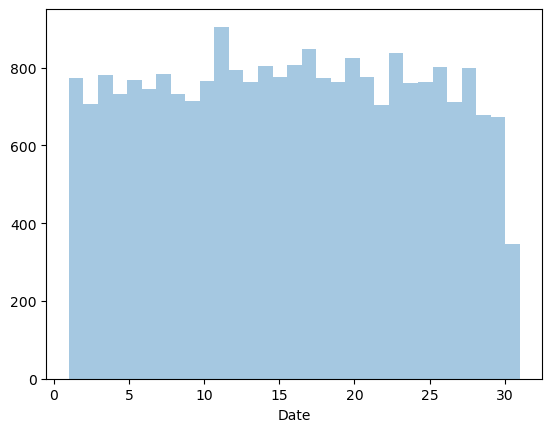

In [128]:
sns.distplot(day_of_month_landslides1,kde=False,bins=31)

# Character encoding

In [129]:
before = "This is the euro symbol: €"
type(before)

str

In [131]:
after = before.encode('utf-8',errors='replace')
type(after)

bytes

In [133]:
after1 = before.encode('ascii',errors='replace')
type(after1)

bytes

# Incositancy data

In [2]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [35]:
import fuzzywuzzy

In [8]:
ca = pd.read_csv('C:/Users/Nikhil/Downloads/pakistan_intellectual_capital.csv')

In [9]:
ca

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1974,1975,Dr. Ahmar Rashid,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,JNU,South Korea,NaN,"Electrical Impedance Tomography, Inverse algor...",NaN
1138,1975,1976,Dr. Fawad Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Grenoble,France,NaN,"Machine Learning, Big Data Anaysis, Data Minin...",NaN
1139,1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012.0,"Digital Multimedia Systems, Video Compression ...",NaN
1140,1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,NaN,"Medical Image Processing and Analysis, Digital...",NaN


In [14]:
countries = ca['Country'].unique()

In [17]:
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [19]:
ca['Country'].head(10)

0    Thailand
1    Thailand
2    Thailand
3    Thailand
4    Pakistan
5    Pakistan
6    Pakistan
7    Pakistan
8    Pakistan
9    Pakistan
Name: Country, dtype: object

In [20]:
ca['Country'] = ca['Country'].str.lower()

In [23]:
ca['Country'] = ca['Country'].str.strip()

In [29]:
countries = ca['Country'].unique()

In [32]:
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

In [36]:
matches = fuzzywuzzy.process.extract('south korea',countries,limit=10,scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [37]:
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [48]:
matches[1]

('southkorea', 48)

In [46]:
ca['Country'].isin(['south korea'])

0       False
1       False
2       False
3       False
4       False
        ...  
1137     True
1138    False
1139    False
1140    False
1141     True
Name: Country, Length: 1142, dtype: bool

In [47]:
ca.loc[ca['Country'].isin(['south korea']),'Country']

489     south korea
677     south korea
685     south korea
764     south korea
906     south korea
931     south korea
1137    south korea
1141    south korea
Name: Country, dtype: object

In [67]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    

In [69]:
replace_matches_in_column(df=ca, column='Country', string_to_match="south korea")

In [70]:
Countries = ca['Country'].unique()

In [71]:
Countries

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'south korea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'macau', 'singapore', 'spain', 'japan',
       'hongkong', 'saudi arabia', 'mauritius', 'scotland'], dtype=object)